# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your Google Cloud credentials to the runtime

In [145]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [146]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

Declare the Cloud project ID which will be used throughout this notebook

In [147]:
project_id = 'cmpe181hw1option1'

In [148]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = danielle.shen@sjsu.edu
project = cmpe181hw1option1

Your active configuration is: [default]


In [163]:
#!gcloud config set compute/region us-central1
#!gcloud config set compute/zone us-central1-a
!gcloud config list project

[core]
project = cmpe181hw1option1

Your active configuration is: [default]


In [164]:
!gcloud config set project 'cmpe181hw1option1'

Updated property [core/project].


In [17]:
!gcloud config list project

[core]
project = cmpe181hw1option1

Your active configuration is: [default]


# BigQuery COVID-19 NYT Example

In [20]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpe181hw1option1'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

In [21]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.covid19_nyt.us_states`
ORDER BY
    date
"""
dfquery = client.query(sql)

In [22]:
df_covid=dfquery.to_dataframe()
df_covid.head(200)

date  state_name state_fips_code  confirmed_cases  deaths
0    2020-01-21  Washington              53                1       0
1    2020-01-22  Washington              53                1       0
2    2020-01-23  Washington              53                1       0
3    2020-01-24    Illinois              17                1       0
4    2020-01-24  Washington              53                1       0
..          ...         ...             ...              ...     ...
195  2020-02-25     Arizona              04                1       0
196  2020-02-25    Illinois              17                2       0
197  2020-02-25    Nebraska              31               13       0
198  2020-02-25   Wisconsin              55                1       0
199  2020-02-25  California              06               11       0

[200 rows x 5 columns]

In [23]:
df_covid.tail(200)

date                state_name  ... confirmed_cases  deaths
20769  2021-03-15                  Arkansas  ...          327060    5481
20770  2021-03-15                  Colorado  ...          446827    6121
20771  2021-03-15                  Delaware  ...           90614    1511
20772  2021-03-15                  Illinois  ...         1213763   23216
20773  2021-03-15                  Kentucky  ...          420010    5147
...           ...                       ...  ...             ...     ...
20964  2021-03-18            North Carolina  ...          896687   11812
20965  2021-03-18            South Carolina  ...          537498    8938
20966  2021-03-18            Virgin Islands  ...            2767      25
20967  2021-03-18      District of Columbia  ...           42892    1046
20968  2021-03-18  Northern Mariana Islands  ...             157       2

[200 rows x 5 columns]

In [24]:
is_California = df_covid['state_name']=='California'

In [25]:
df_ca=df_covid[is_California]
df_ca.head()

date  state_name state_fips_code  confirmed_cases  deaths
6   2020-01-25  California              06                1       0
10  2020-01-26  California              06                2       0
14  2020-01-27  California              06                2       0
18  2020-01-28  California              06                2       0
22  2020-01-29  California              06                2       0

In [26]:
df_ca.tail(30)

date  state_name state_fips_code  confirmed_cases  deaths
19355  2021-02-17  California              06          3505490   47902
19410  2021-02-18  California              06          3512881   48334
19465  2021-02-19  California              06          3521230   48794
19520  2021-02-20  California              06          3526828   49111
19575  2021-02-21  California              06          3531474   49340
19630  2021-02-22  California              06          3536916   49531
19685  2021-02-23  California              06          3543172   49869
19740  2021-02-24  California              06          3548559   50953
19795  2021-02-25  California              06          3554195   51385
19850  2021-02-26  California              06          3561560   51794
19905  2021-02-27  California              06          3565496   51979
19960  2021-02-28  California              06          3568991   52213
20015  2021-03-01  California              06          3573656   52487
20070  2021-03-02  California              06          3577973   52774
20125  2021-03-03  California              06          3582377   53066
20180  2021-03-04  California              06          3587633   53457
20235  2021-03-05  California              06          3592698   53838
20290  2021-03-06  California              06          3596488   54124
20345  2021-03-07  California              06          3599242   54217
20400  2021-03-08  California              06          3603893   54377
20455  2021-03-09  California              06          3608022   54620
20510  2021-03-10  California              06          3611490   54877
20565  2021-03-11  California              06          3615049   55132
20620  2021-03-12  California              06          3617356   55336
20675  2021-03-13  California              06          3620613   56349
20730  2021-03-14  California              06          3622863   56499
20785  2021-03-15  California              06          3626304   56606
20840  2021-03-16  California              06          3628366   56719
20895  2021-03-17  California              06          3631735   56952
20950  2021-03-18  California              06          3634811   57187

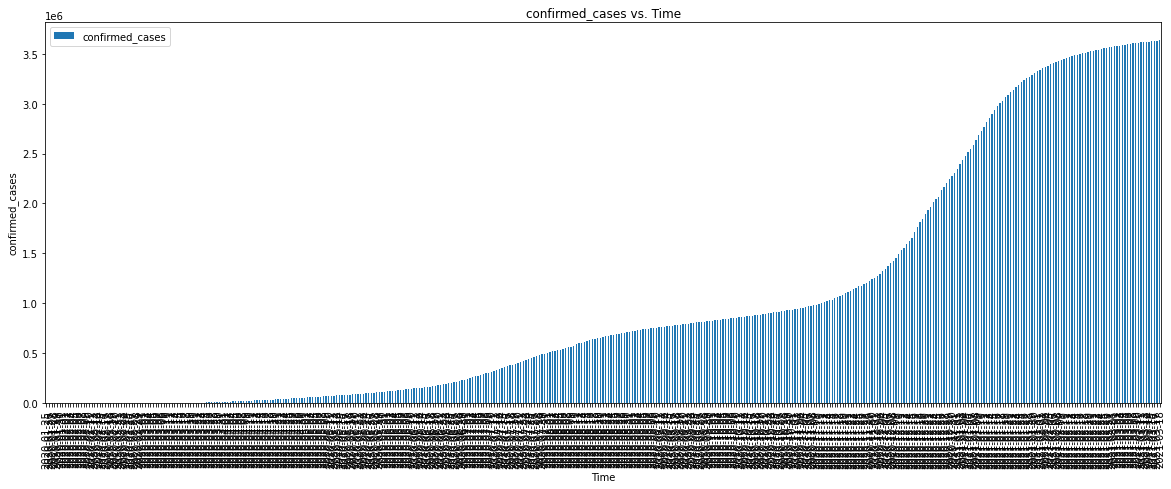

In [27]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
ax = df_ca.plot(kind='bar', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

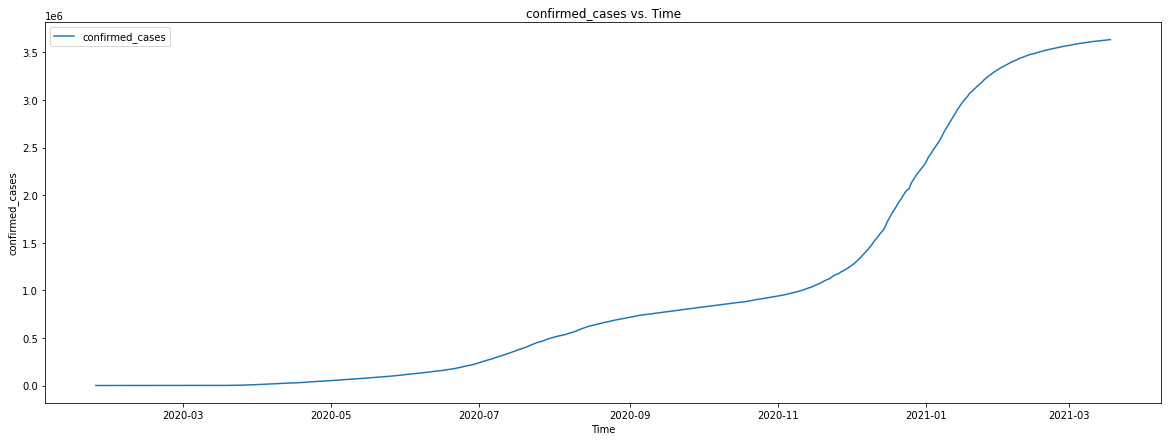

In [28]:
ax = df_ca.plot(kind='line', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

In [29]:
ax.figure.savefig("nytcovid_confirmed_cases.pdf")

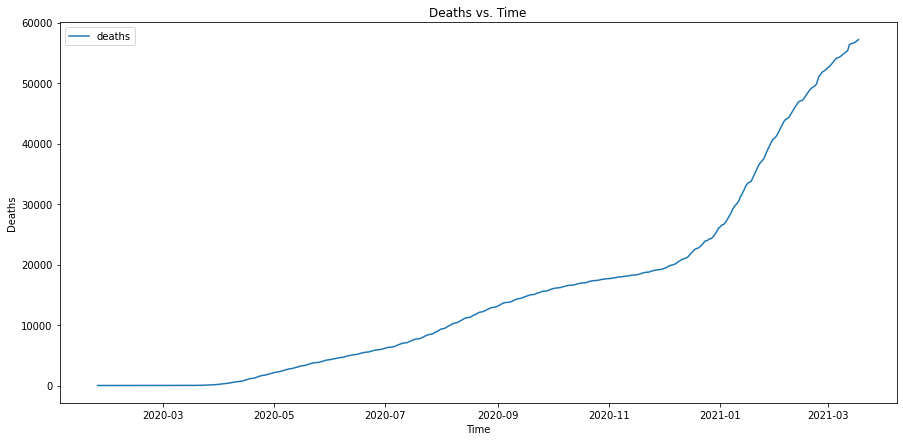

In [30]:
ax = df_ca.plot(kind='line', x='date', y='deaths', figsize=(15,7))
ax.set_title('Deaths vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Deaths');
ax.figure.savefig("nytcovid_Deaths.pdf")

## Save Files and Connect to Google Drive
ref: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [ ]:
#Click download in Files section, or use the following command
from google.colab import files
files.download('nytcovid_Deaths.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pwd

/content


In [ ]:
#Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp ./nytcovid_confirmed_cases.pdf ./drive/My\ Drive/Colab\ Notebooks/CMPE181Sp2021

## Prediction

In [35]:
! pip install fbprophet
#https://facebook.github.io/prophet/

In [37]:
from fbprophet import Prophet
import pandas as pd

In [38]:
# Set variables 
country = 'United States'
filter_case = 'confirmed_cases' #
period_to_forecast = 45

# Filter data
#df = df[df['location']==country]
df_ca.rename(columns={"date": "ds", filter_case: "y"},inplace=True) 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df_ca['ds'] = pd.to_datetime(df_ca['ds'],infer_datetime_format=True)
df_ca = df_ca[df_ca['ds']>"2020-02-01"]
df_ca['y'] = df_ca['y'].astype(int)
df_ca = df_ca[['y','ds']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df_ca

y         ds
39           6 2020-02-02
44           6 2020-02-03
49           6 2020-02-04
55           6 2020-02-05
61           6 2020-02-06
...        ...        ...
20730  3622863 2021-03-14
20785  3626304 2021-03-15
20840  3628366 2021-03-16
20895  3631735 2021-03-17
20950  3634811 2021-03-18

[411 rows x 2 columns]

In [41]:
# Run Prophet to get predictions
pred = Prophet(yearly_seasonality=False, daily_seasonality=False)
pred.fit(df_ca)
future = pred.make_future_dataframe(periods=60)
forecast = pred.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [42]:
forecast.tail()

ds         trend  ...  multiplicative_terms_upper          yhat
466 2021-05-13  5.275020e+06  ...                         0.0  5.271476e+06
467 2021-05-14  5.296964e+06  ...                         0.0  5.299800e+06
468 2021-05-15  5.318909e+06  ...                         0.0  5.321296e+06
469 2021-05-16  5.340853e+06  ...                         0.0  5.342172e+06
470 2021-05-17  5.362797e+06  ...                         0.0  5.363078e+06

[5 rows x 16 columns]

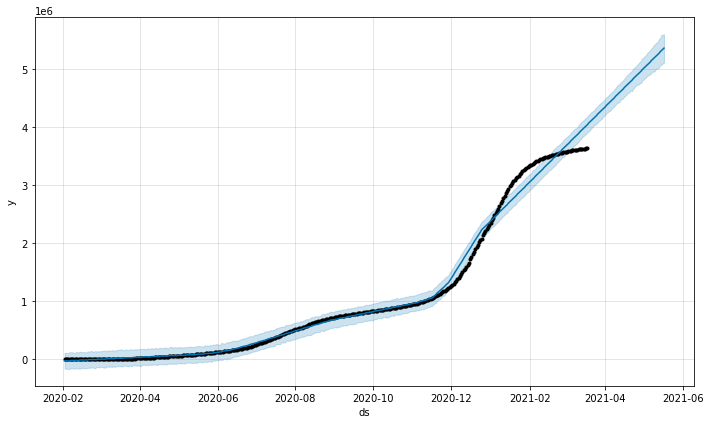

In [43]:
#Plot the prediction Graph
graph = pred.plot(forecast)

In [44]:
graph.savefig("Prophet_prediction.pdf")

In [46]:
df_ca.to_csv('df_ca.csv', index=False)

# COVID-19 JHU Coronavirus COVID-19 Global Cases, by country
ref: https://console.cloud.google.com/marketplace/details/johnshopkins/covid19_jhu_global_cases?filter=solution-type%3Adataset&filter=category%3Acovid19&id=430e16bb-bd19-42dd-bb7a-d38386a9edf5

In [56]:
from google.cloud import bigquery
project_id = 'cmpe181hw1option1'
client = bigquery.Client(project=project_id)


In [57]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = danielle.shen@sjsu.edu
project = cmpe181hw1option1

Your active configuration is: [default]


In [58]:
sql_covid19_jhu = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.summary` 
WHERE
  country_region = "US"
  AND date = '2021-01-29'
ORDER BY
  confirmed desc
"""
dfquery_covid19_jhu = client.query(sql_covid19_jhu)
df_covid19=dfquery_covid19_jhu.to_dataframe()
df_covid19.head(100)

province_state country_region  ...       admin2                 combined_key
0      California             US  ...  Los Angeles  Los Angeles, California, US
1         Arizona             US  ...     Maricopa        Maricopa, Arizona, US
2        Illinois             US  ...         Cook           Cook, Illinois, US
3         Florida             US  ...   Miami-Dade      Miami-Dade, Florida, US
4           Texas             US  ...       Harris            Harris, Texas, US
..            ...            ...  ...          ...                          ...
95        Florida             US  ...         Polk            Polk, Florida, US
96         Kansas             US  ...      Johnson          Johnson, Kansas, US
97  Massachusetts             US  ...      Bristol   Bristol, Massachusetts, US
98     New Jersey             US  ...        Ocean        Ocean, New Jersey, US
99       Michigan             US  ...         Kent           Kent, Michigan, US

[100 rows x 13 columns]

In [60]:
sql_covid19_jhu = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.summary` 
WHERE
  country_region = "US"
"""
dfquery_covid19_jhu = client.query(sql_covid19_jhu)
df_covid19=dfquery_covid19_jhu.to_dataframe()
df_covid19.head(100)

province_state country_region  ...       admin2                combined_key
0       Wisconsin             US  ...      Shawano      Shawano, Wisconsin, US
1       Wisconsin             US  ...         Dunn         Dunn, Wisconsin, US
2       Wisconsin             US  ...     Florence     Florence, Wisconsin, US
3       Wisconsin             US  ...   Green Lake   Green Lake, Wisconsin, US
4       Wisconsin             US  ...  Trempealeau  Trempealeau, Wisconsin, US
..            ...            ...  ...          ...                         ...
95     New Mexico             US  ...   Unassigned  Unassigned, New Mexico, US
96     New Mexico             US  ...   San Miguel  San Miguel, New Mexico, US
97     New Mexico             US  ...        Grant       Grant, New Mexico, US
98     New Mexico             US  ...       Chaves      Chaves, New Mexico, US
99     New Mexico             US  ...    Guadalupe   Guadalupe, New Mexico, US

[100 rows x 13 columns]

In [61]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149527 entries, 0 to 1149526
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   province_state  1149527 non-null  object 
 1   country_region  1149527 non-null  object 
 2   date            1149527 non-null  object 
 3   latitude        1126180 non-null  float64
 4   longitude       1126180 non-null  float64
 5   location_geom   1126180 non-null  object 
 6   confirmed       1149527 non-null  int64  
 7   deaths          1149497 non-null  float64
 8   recovered       1110196 non-null  float64
 9   active          1108532 non-null  float64
 10  fips            1143665 non-null  object 
 11  admin2          1145670 non-null  object 
 12  combined_key    1147967 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 114.0+ MB


In [62]:
import pandas as pd
#convert date variable to datetine object
df_covid19['date'] = pd.to_datetime(df_covid19['date'])
df_covid19.head(100)

province_state country_region  ...       admin2                combined_key
0       Wisconsin             US  ...      Shawano      Shawano, Wisconsin, US
1       Wisconsin             US  ...         Dunn         Dunn, Wisconsin, US
2       Wisconsin             US  ...     Florence     Florence, Wisconsin, US
3       Wisconsin             US  ...   Green Lake   Green Lake, Wisconsin, US
4       Wisconsin             US  ...  Trempealeau  Trempealeau, Wisconsin, US
..            ...            ...  ...          ...                         ...
95     New Mexico             US  ...   Unassigned  Unassigned, New Mexico, US
96     New Mexico             US  ...   San Miguel  San Miguel, New Mexico, US
97     New Mexico             US  ...        Grant       Grant, New Mexico, US
98     New Mexico             US  ...       Chaves      Chaves, New Mexico, US
99     New Mexico             US  ...    Guadalupe   Guadalupe, New Mexico, US

[100 rows x 13 columns]

In [63]:
df_covid19.describe()

latitude     longitude  ...     recovered        active
count  1.126180e+06  1.126180e+06  ...  1.110196e+06  1.108532e+06
mean   3.800415e+01 -9.131561e+01  ...  4.534073e+02  2.531554e+03
std    5.884687e+00  1.443943e+01  ...  3.909461e+04  4.217753e+04
min   -1.427100e+01 -1.741596e+02  ...  0.000000e+00 -6.298082e+06
25%    3.437367e+01 -9.765460e+01  ...  0.000000e+00  4.700000e+01
50%    3.818109e+01 -8.975863e+01  ...  0.000000e+00  3.600000e+02
75%    4.168560e+01 -8.298196e+01  ...  0.000000e+00  1.567000e+03
max    6.931479e+01  1.456739e+02  ...  6.399531e+06  2.461378e+06

[8 rows x 6 columns]

In [64]:
df_covid19.isnull().sum()

province_state        0
country_region        0
date                  0
latitude          23347
longitude         23347
location_geom     23347
confirmed             0
deaths               30
recovered         39331
active            40995
fips               5862
admin2             3857
combined_key       1560
dtype: int64

In [65]:
import numpy as np
df_covid19['latitude'] = df_covid19['latitude'].replace(np.nan,'nan')
df_covid19['longitude'] = df_covid19['longitude'].replace(np.nan,'nan')
df_covid19['deaths'] = df_covid19['deaths'].replace(np.nan,'nan')

In [66]:
df_covid19['deaths'] = df_covid19['deaths'].replace(np.nan,0)
df_covid19['deaths'] = df_covid19['deaths'].replace('nan',0)
df_covid19['deaths'] = df_covid19['deaths'].replace('NaN',0)

In [67]:
df_covid19.isnull().sum()

province_state        0
country_region        0
date                  0
latitude              0
longitude             0
location_geom     23347
confirmed             0
deaths                0
recovered         39331
active            40995
fips               5862
admin2             3857
combined_key       1560
dtype: int64

In [ ]:
#df_covid19 = df_covid19.sort_values(by=['province_state','date'])
df_covid19 = df_covid19.sort_values(by=['date', 'province_state'])
df_covid19.tail(100)

province_state country_region  ...      admin2                   combined_key
839405  West Virginia             US  ...       Wayne       Wayne, West Virginia, US
839406  West Virginia             US  ...     Wyoming     Wyoming, West Virginia, US
898949  West Virginia             US  ...  Unassigned  Unassigned, West Virginia, US
160282      Wisconsin             US  ...      Barron          Barron, Wisconsin, US
160283      Wisconsin             US  ...       Brown           Brown, Wisconsin, US
...               ...            ...  ...         ...                            ...
784648        Wyoming             US  ...      Goshen            Goshen, Wyoming, US
784649        Wyoming             US  ...        Park              Park, Wyoming, US
819220        Wyoming             US  ...    Washakie          Washakie, Wyoming, US
836545        Wyoming             US  ...    Big Horn          Big Horn, Wyoming, US
895851        Wyoming             US  ...  Unassigned        Unassigned, Wyoming, US

[100 rows x 13 columns]

In [72]:
first_day = min(df_covid19['date'])
last_day = max(df_covid19['date'])
print('First day {}, Last day {}, Number of days {}'.format(first_day, last_day, (last_day - first_day).days + 1))

First day 2020-01-22 00:00:00, Last day 2021-03-18 00:00:00, Number of days 422


In [71]:
ddd=df_covid19.groupby('date')[['confirmed','deaths']]
ddd.sum()

confirmed    deaths
date                           
2020-01-22          1       0.0
2020-01-23          1       0.0
2020-01-24          2       0.0
2020-01-25          2       0.0
2020-01-26          5       0.0
...               ...       ...
2021-03-14   29438775  534888.0
2021-03-15   29495424  535628.0
2021-03-16   29549003  536914.0
2021-03-17   29607483  538087.0
2021-03-18   29668587  539698.0

[422 rows x 2 columns]

In [73]:
info_us = pd.DataFrame(ddd.sum()).reset_index().sort_values(by='date')
info_us.tail(10)

date  confirmed    deaths
412 2021-03-09   29096048  527699.0
413 2021-03-10   29236735  529263.0
414 2021-03-11   29286134  530821.0
415 2021-03-12   29347338  532590.0
416 2021-03-13   29400553  534316.0
417 2021-03-14   29438775  534888.0
418 2021-03-15   29495424  535628.0
419 2021-03-16   29549003  536914.0
420 2021-03-17   29607483  538087.0
421 2021-03-18   29668587  539698.0

In [74]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

# Create figure with secondary y-axis, ref: https://plotly.com/python/multiple-axes/
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=info_us.date, y=info_us.confirmed, name='Confirmed Cases', line=dict(color='cyan')))
fig.add_trace(go.Scatter(x=info_us.date, y=info_us.deaths, name='Fatalities', line=dict(color='purple')), secondary_y=True)

fig.update_yaxes(title_text="Confirmed Cases", secondary_y=False)
fig.update_yaxes(title_text="Fatalities", secondary_y=True)
fig.update_layout(title_text='Confirmed Cases and Fatalities', title_x=0.5)
fig.show()
#fig.write_image("images/fig1.pdf")
#fig.write_image("images/fig1.svg")

## Confirmed cases map view

In [75]:
df_country = df_covid19[df_covid19['date'] == max(df_covid19['date'])].copy()
fig = px.scatter_geo(df_country,
                     lat='latitude', lon='longitude', color="country_region",
                     hover_name="country_region", size="confirmed",
                     projection="natural earth")
fig.update_geos(scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='US Confirmed Cases - {}'.format(max(df_covid19['date'])), title_x=0.5)
fig.show()

In [76]:
fig = px.scatter_geo(df_country,
                     lat='latitude', lon='longitude', color="country_region",
                     hover_name="country_region", size="deaths",
                     projection="natural earth")#,animation_frame="date")
fig.update_geos(scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='US Fatalities - {}'.format(max(df_covid19['date'])), title_x=0.5)
fig.show()

## Top 10 states - Confirmed Cases

In [77]:
print(last_day)
topStateConfCases = pd.DataFrame(df_covid19[df_covid19['date'] == last_day].groupby(['province_state'])['confirmed'].sum()).reset_index().sort_values(by='confirmed', ascending=False).reset_index(drop=True).loc[:10,'province_state'].values

2021-03-18 00:00:00


In [78]:
topStateConfCases

array(['California', 'Texas', 'Florida', 'New York', 'Illinois',
       'Georgia', 'Ohio', 'Pennsylvania', 'North Carolina', 'New Jersey',
       'Arizona'], dtype=object)

In [79]:
fig = go.Figure()
for state in topStateConfCases:
    info_state = pd.DataFrame(df_covid19[df_covid19['province_state'] == state].groupby('date')['confirmed'].sum()).reset_index().sort_values(by='date')
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.confirmed, name=state))
fig.update_layout(title_text='Confirmed Cases in top 10 states', title_x=0.5)
fig.show()

## Top 10 states - New Cases

In [80]:
df_confCases = pd.DataFrame(df_covid19.groupby(['date','province_state'])['confirmed'].sum()).reset_index().sort_values(by=['province_state','date'])
df_confCases.tail(30)

date   province_state  confirmed
21113 2021-02-21          Wyoming      53795
21171 2021-02-22          Wyoming      53900
21229 2021-02-23          Wyoming      53944
21287 2021-02-24          Wyoming      53988
21345 2021-02-25          Wyoming      54202
21403 2021-02-26          Wyoming      54350
21461 2021-02-27          Wyoming      54350
21519 2021-02-28          Wyoming      54394
21577 2021-03-01          Wyoming      54471
21635 2021-03-02          Wyoming      54527
21693 2021-03-03          Wyoming      54616
21751 2021-03-04          Wyoming      54685
21809 2021-03-05          Wyoming      54764
21867 2021-03-06          Wyoming      54764
21925 2021-03-07          Wyoming      54764
21983 2021-03-08          Wyoming      54903
22041 2021-03-09          Wyoming      54972
22099 2021-03-10          Wyoming      55014
22157 2021-03-11          Wyoming      55112
22215 2021-03-12          Wyoming      55163
22273 2021-03-13          Wyoming      55163
22331 2021-03-14          Wyoming      55163
22389 2021-03-15          Wyoming      55327
22447 2021-03-16          Wyoming      55352
22505 2021-03-17          Wyoming      55449
22563 2021-03-18          Wyoming      55479
594   2020-03-06  Yolo County, CA          1
676   2020-03-07  Yolo County, CA          1
782   2020-03-08  Yolo County, CA          1
898   2020-03-09  Yolo County, CA          1

In [81]:
for state in df_confCases['province_state'].unique():
    confirmdf=df_confCases.loc[df_confCases['province_state'] == state,'confirmed'] # select state
    newconfirmdf=np.diff(confirmdf) # new cases
    df_confCases.loc[df_confCases['province_state'] == state, 'NewCases'] = np.append(0, newconfirmdf)
df_confCases.tail(30)

date   province_state  confirmed  NewCases
21113 2021-02-21          Wyoming      53795     112.0
21171 2021-02-22          Wyoming      53900     105.0
21229 2021-02-23          Wyoming      53944      44.0
21287 2021-02-24          Wyoming      53988      44.0
21345 2021-02-25          Wyoming      54202     214.0
21403 2021-02-26          Wyoming      54350     148.0
21461 2021-02-27          Wyoming      54350       0.0
21519 2021-02-28          Wyoming      54394      44.0
21577 2021-03-01          Wyoming      54471      77.0
21635 2021-03-02          Wyoming      54527      56.0
21693 2021-03-03          Wyoming      54616      89.0
21751 2021-03-04          Wyoming      54685      69.0
21809 2021-03-05          Wyoming      54764      79.0
21867 2021-03-06          Wyoming      54764       0.0
21925 2021-03-07          Wyoming      54764       0.0
21983 2021-03-08          Wyoming      54903     139.0
22041 2021-03-09          Wyoming      54972      69.0
22099 2021-03-10          Wyoming      55014      42.0
22157 2021-03-11          Wyoming      55112      98.0
22215 2021-03-12          Wyoming      55163      51.0
22273 2021-03-13          Wyoming      55163       0.0
22331 2021-03-14          Wyoming      55163       0.0
22389 2021-03-15          Wyoming      55327     164.0
22447 2021-03-16          Wyoming      55352      25.0
22505 2021-03-17          Wyoming      55449      97.0
22563 2021-03-18          Wyoming      55479      30.0
594   2020-03-06  Yolo County, CA          1       0.0
676   2020-03-07  Yolo County, CA          1       0.0
782   2020-03-08  Yolo County, CA          1       0.0
898   2020-03-09  Yolo County, CA          1       0.0

In [82]:
#select top new cases of state in the last day
topStateNewCases = df_confCases[df_confCases['date'] == last_day].sort_values(by='NewCases', ascending=False).reset_index(drop=True).loc[:10,'province_state'].values
topStateNewCases

array(['New York', 'Florida', 'New Jersey', 'California', 'Texas',
       'Pennsylvania', 'Michigan', 'Illinois', 'Georgia', 'Ohio',
       'Virginia'], dtype=object)

In [83]:
fig = go.Figure()
for state in topStateNewCases:
    info_state = df_confCases[df_confCases['province_state'] == state]
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.NewCases, name=state))
fig.update_layout(title_text='New Cases in top 10 states', title_x=0.5)
fig.show()

## Top 10 states - Fatalities

In [84]:
lastday_df=df_covid19[df_covid19['date'] == last_day] #Last day data
lastday_df=lastday_df.groupby(['province_state'])
lastday_df.tail(30)

province_state  ...                   combined_key
961210    Massachusetts  ...     Suffolk, Massachusetts, US
961211          Arizona  ...            Apache, Arizona, US
961426          Wyoming  ...           Fremont, Wyoming, US
961462         Maryland  ...       Washington, Maryland, US
961609       New Jersey  ...       Atlantic, New Jersey, US
...                 ...  ...                            ...
1002065    Pennsylvania  ...      Montour, Pennsylvania, US
1002091  North Carolina  ...     Person, North Carolina, US
1002099  South Carolina  ...  Fairfield, South Carolina, US
1002113          Nevada  ...         Unassigned, Nevada, US
1002140        Colorado  ...       Unassigned, Colorado, US

[1319 rows x 13 columns]

In [85]:
lastday_death_df=lastday_df['deaths']
lastday_death_df.sum()

province_state
Alabama                     10391.0
Alaska                        310.0
Arizona                     16645.0
Arkansas                     5515.0
California                  57200.0
Colorado                     6060.0
Connecticut                  7822.0
Delaware                     1517.0
Diamond Princess                0.0
District of Columbia         1046.0
Florida                     32598.0
Georgia                     18420.0
Grand Princess                  3.0
Guam                          134.0
Hawaii                        450.0
Idaho                        1938.0
Illinois                    23287.0
Indiana                     12907.0
Iowa                         5672.0
Kansas                       4793.0
Kentucky                     5504.0
Louisiana                    9974.0
Maine                         727.0
Maryland                     8113.0
Massachusetts               16759.0
Michigan                    16843.0
Minnesota                    6830.0
Mississippi  

In [86]:
topstatedeath_pd=pd.DataFrame(lastday_death_df.sum())
topstatedeath_pd

deaths
province_state                   
Alabama                   10391.0
Alaska                      310.0
Arizona                   16645.0
Arkansas                   5515.0
California                57200.0
Colorado                   6060.0
Connecticut                7822.0
Delaware                   1517.0
Diamond Princess              0.0
District of Columbia       1046.0
Florida                   32598.0
Georgia                   18420.0
Grand Princess                3.0
Guam                        134.0
Hawaii                      450.0
Idaho                      1938.0
Illinois                  23287.0
Indiana                   12907.0
Iowa                       5672.0
Kansas                     4793.0
Kentucky                   5504.0
Louisiana                  9974.0
Maine                       727.0
Maryland                   8113.0
Massachusetts             16759.0
Michigan                  16843.0
Minnesota                  6830.0
Mississippi                6938.0
Missouri                   8708.0
Montana                    1406.0
Nebraska                   2130.0
Nevada                     5157.0
New Hampshire              1207.0
New Jersey                24076.0
New Mexico                 3877.0
New York                  49262.0
North Carolina            11783.0
North Dakota               1490.0
Northern Mariana Islands      2.0
Ohio                      17991.0
Oklahoma                   4788.0
Oregon                     2353.0
Pennsylvania              24722.0
Puerto Rico                2089.0
Recovered                     0.0
Rhode Island               2594.0
South Carolina             8938.0
South Dakota               1919.0
Tennessee                 11681.0
Texas                     47025.0
Utah                       2041.0
Vermont                     217.0
Virgin Islands               25.0
Virginia                  10182.0
Washington                 5168.0
West Virginia              2570.0
Wisconsin                  7208.0
Wyoming                     693.0

In [87]:
topstatedeath_pd=topstatedeath_pd.reset_index().sort_values(by='deaths', ascending=False)
topstatedeath_pd

province_state   deaths
4                 California  57200.0
35                  New York  49262.0
49                     Texas  47025.0
10                   Florida  32598.0
42              Pennsylvania  24722.0
33                New Jersey  24076.0
16                  Illinois  23287.0
11                   Georgia  18420.0
39                      Ohio  17991.0
25                  Michigan  16843.0
24             Massachusetts  16759.0
2                    Arizona  16645.0
17                   Indiana  12907.0
36            North Carolina  11783.0
48                 Tennessee  11681.0
0                    Alabama  10391.0
53                  Virginia  10182.0
21                 Louisiana   9974.0
46            South Carolina   8938.0
28                  Missouri   8708.0
23                  Maryland   8113.0
6                Connecticut   7822.0
56                 Wisconsin   7208.0
27               Mississippi   6938.0
26                 Minnesota   6830.0
5                   Colorado   6060.0
18                      Iowa   5672.0
3                   Arkansas   5515.0
20                  Kentucky   5504.0
54                Washington   5168.0
31                    Nevada   5157.0
19                    Kansas   4793.0
40                  Oklahoma   4788.0
34                New Mexico   3877.0
45              Rhode Island   2594.0
55             West Virginia   2570.0
41                    Oregon   2353.0
30                  Nebraska   2130.0
43               Puerto Rico   2089.0
50                      Utah   2041.0
15                     Idaho   1938.0
47              South Dakota   1919.0
7                   Delaware   1517.0
37              North Dakota   1490.0
29                   Montana   1406.0
32             New Hampshire   1207.0
9       District of Columbia   1046.0
22                     Maine    727.0
57                   Wyoming    693.0
14                    Hawaii    450.0
1                     Alaska    310.0
51                   Vermont    217.0
13                      Guam    134.0
52            Virgin Islands     25.0
12            Grand Princess      3.0
38  Northern Mariana Islands      2.0
44                 Recovered      0.0
8           Diamond Princess      0.0

In [88]:
topstatedeath_pd=topstatedeath_pd.reset_index(drop=True) #drops the current index of the DataFrame and replaces it with an index of increasing integers.
topstatedeath_pd

province_state   deaths
0                 California  57200.0
1                   New York  49262.0
2                      Texas  47025.0
3                    Florida  32598.0
4               Pennsylvania  24722.0
5                 New Jersey  24076.0
6                   Illinois  23287.0
7                    Georgia  18420.0
8                       Ohio  17991.0
9                   Michigan  16843.0
10             Massachusetts  16759.0
11                   Arizona  16645.0
12                   Indiana  12907.0
13            North Carolina  11783.0
14                 Tennessee  11681.0
15                   Alabama  10391.0
16                  Virginia  10182.0
17                 Louisiana   9974.0
18            South Carolina   8938.0
19                  Missouri   8708.0
20                  Maryland   8113.0
21               Connecticut   7822.0
22                 Wisconsin   7208.0
23               Mississippi   6938.0
24                 Minnesota   6830.0
25                  Colorado   6060.0
26                      Iowa   5672.0
27                  Arkansas   5515.0
28                  Kentucky   5504.0
29                Washington   5168.0
30                    Nevada   5157.0
31                    Kansas   4793.0
32                  Oklahoma   4788.0
33                New Mexico   3877.0
34              Rhode Island   2594.0
35             West Virginia   2570.0
36                    Oregon   2353.0
37                  Nebraska   2130.0
38               Puerto Rico   2089.0
39                      Utah   2041.0
40                     Idaho   1938.0
41              South Dakota   1919.0
42                  Delaware   1517.0
43              North Dakota   1490.0
44                   Montana   1406.0
45             New Hampshire   1207.0
46      District of Columbia   1046.0
47                     Maine    727.0
48                   Wyoming    693.0
49                    Hawaii    450.0
50                    Alaska    310.0
51                   Vermont    217.0
52                      Guam    134.0
53            Virgin Islands     25.0
54            Grand Princess      3.0
55  Northern Mariana Islands      2.0
56                 Recovered      0.0
57          Diamond Princess      0.0

In [89]:
topStatesdeaths = topstatedeath_pd.loc[:10,'province_state'].values #select top 10 rows of states
topStatesdeaths

array(['California', 'New York', 'Texas', 'Florida', 'Pennsylvania',
       'New Jersey', 'Illinois', 'Georgia', 'Ohio', 'Michigan',
       'Massachusetts'], dtype=object)

In [90]:
fig = go.Figure()
for state in topStatesdeaths:
    info_state = pd.DataFrame(df_covid19[df_covid19['province_state'] == state].groupby('date')['deaths'].sum()).reset_index().sort_values(by='date')
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.deaths, name=state))
fig.update_layout(title_text='Fatalities in top 10 states', title_x=0.5)
fig.show()

# MyModel

Linear Regression 

In [185]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
def f(x):
    return np.exp(3 * x)

In [187]:
#generate the values along the curve on [0,2].
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [188]:
y = info_state.deaths
x = info_state.date

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--r')
ax.plot(x, y, 'ok', '--r')
ax.set_xlim(1,  400000000)
ax.set_ylim(1, 400000000)
ax.set_title('Top Deaths')

Text(0.5, 1.0, 'Top Deaths')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f079fdfd950> (for post_execute):


ValueError: ignored

ValueError: ignored

## ARIMA Model

In [91]:
!pip install pmdarima #https://pypi.org/project/pmdarima/

     |████████████████████████████████| 1.5MB 5.8MB/s 
     |████████████████████████████████| 9.5MB 25.7MB/s 
     |████████████████████████████████| 2.1MB 52.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [92]:
from pmdarima import auto_arima

In [93]:
df_covid19_new = df_covid19.groupby(['province_state','date'])[['confirmed','deaths']].sum().reset_index()

In [94]:
df_covid19_new.tail(30)

province_state       date  confirmed  deaths
22534          Wyoming 2021-02-21      53795   662.0
22535          Wyoming 2021-02-22      53900   662.0
22536          Wyoming 2021-02-23      53944   671.0
22537          Wyoming 2021-02-24      53988   671.0
22538          Wyoming 2021-02-25      54202   671.0
22539          Wyoming 2021-02-26      54350   671.0
22540          Wyoming 2021-02-27      54350   671.0
22541          Wyoming 2021-02-28      54394   671.0
22542          Wyoming 2021-03-01      54471   671.0
22543          Wyoming 2021-03-02      54527   682.0
22544          Wyoming 2021-03-03      54616   682.0
22545          Wyoming 2021-03-04      54685   682.0
22546          Wyoming 2021-03-05      54764   682.0
22547          Wyoming 2021-03-06      54764   682.0
22548          Wyoming 2021-03-07      54764   682.0
22549          Wyoming 2021-03-08      54903   682.0
22550          Wyoming 2021-03-09      54972   691.0
22551          Wyoming 2021-03-10      55014   691.0
22552          Wyoming 2021-03-11      55112   691.0
22553          Wyoming 2021-03-12      55163   691.0
22554          Wyoming 2021-03-13      55163   691.0
22555          Wyoming 2021-03-14      55163   691.0
22556          Wyoming 2021-03-15      55327   691.0
22557          Wyoming 2021-03-16      55352   693.0
22558          Wyoming 2021-03-17      55449   693.0
22559          Wyoming 2021-03-18      55479   693.0
22560  Yolo County, CA 2020-03-06          1     0.0
22561  Yolo County, CA 2020-03-07          1     0.0
22562  Yolo County, CA 2020-03-08          1     0.0
22563  Yolo County, CA 2020-03-09          1     0.0

In [95]:
from datetime import timedelta
last_day - timedelta(days=15), last_day
(last_day - timedelta(days=15)) - first_day

Timedelta('406 days 00:00:00')

In [96]:
Ndays_forecast_val = 15
covid19_train = df_covid19_new[df_covid19_new['date'] <= last_day - timedelta(days=Ndays_forecast_val)]
covid19_val = df_covid19_new[df_covid19_new['date'] > last_day - timedelta(days=Ndays_forecast_val)]

In [97]:
covid19_train.tail(30)

province_state       date  confirmed  deaths
22519          Wyoming 2021-02-06      52618   624.0
22520          Wyoming 2021-02-07      52627   624.0
22521          Wyoming 2021-02-08      52784   624.0
22522          Wyoming 2021-02-09      52830   647.0
22523          Wyoming 2021-02-10      52874   647.0
22524          Wyoming 2021-02-11      52979   647.0
22525          Wyoming 2021-02-12      53086   647.0
22526          Wyoming 2021-02-13      53086   647.0
22527          Wyoming 2021-02-14      53136   647.0
22528          Wyoming 2021-02-15      53136   647.0
22529          Wyoming 2021-02-16      53351   662.0
22530          Wyoming 2021-02-17      53450   662.0
22531          Wyoming 2021-02-18      53531   662.0
22532          Wyoming 2021-02-19      53683   662.0
22533          Wyoming 2021-02-20      53683   662.0
22534          Wyoming 2021-02-21      53795   662.0
22535          Wyoming 2021-02-22      53900   662.0
22536          Wyoming 2021-02-23      53944   671.0
22537          Wyoming 2021-02-24      53988   671.0
22538          Wyoming 2021-02-25      54202   671.0
22539          Wyoming 2021-02-26      54350   671.0
22540          Wyoming 2021-02-27      54350   671.0
22541          Wyoming 2021-02-28      54394   671.0
22542          Wyoming 2021-03-01      54471   671.0
22543          Wyoming 2021-03-02      54527   682.0
22544          Wyoming 2021-03-03      54616   682.0
22560  Yolo County, CA 2020-03-06          1     0.0
22561  Yolo County, CA 2020-03-07          1     0.0
22562  Yolo County, CA 2020-03-08          1     0.0
22563  Yolo County, CA 2020-03-09          1     0.0

In [98]:
dict_order_cc = {}
dict_order_ft = {}
y_arima = covid19_val.copy()
y_arima_lower = covid19_val.copy()
y_arima_upper = covid19_val.copy()

In [99]:
stateconfirmed=covid19_train.groupby(['province_state'])
stateconfirmed.tail(30)

province_state       date  confirmed  deaths
326            Alabama 2021-02-02     462938  7894.0
327            Alabama 2021-02-03     465056  8203.0
328            Alabama 2021-02-04     467823  8365.0
329            Alabama 2021-02-05     469319  8449.0
330            Alabama 2021-02-06     471311  8513.0
...                ...        ...        ...     ...
22544          Wyoming 2021-03-03      54616   682.0
22560  Yolo County, CA 2020-03-06          1     0.0
22561  Yolo County, CA 2020-03-07          1     0.0
22562  Yolo County, CA 2020-03-08          1     0.0
22563  Yolo County, CA 2020-03-09          1     0.0

[2596 rows x 4 columns]

In [100]:
confirmed_y=covid19_train.loc[covid19_train['province_state'] == 'California','confirmed'].values
confirmed_y

array([      2,       2,       2,       2,       2,       2,     144,
           177,     221,     282,     340,     426,     557,     698,
           751,     952,    1177,    1364,    1646,    2108,    2538,
          2998,    3899,    4657,    5095,    5852,    7138,    8210,
          9399,   10773,   12004,   12837,   15034,   16019,   17351,
         18897,   19710,   21081,   21706,   22795,   23931,   25356,
         26686,   27677,   29157,   30491,   31431,   33686,   35465,
         37344,   39561,   41355,   42368,   43558,   44966,   46164,
         48747,   50130,   52026,   53347,   54903,   55884,   58456,
         60616,   62148,   63779,   66558,   67600,   69329,   70978,
         72798,   74871,   76693,   78725,   80166,   81457,   83752,
         85997,   88031,   90252,   92539,   94020,   96400,   99387,
        101050,  103813,  106622,  109895,  111951,  114733,  117215,
        119348,  122168,  125738,  128593,  130615,  133816,  136641,
        139715,  143

In [101]:
arima_model_cc = auto_arima(confirmed_y,
                         start_p=0, start_q=0, start_d=0, max_p=10, max_q=3, max_d=3,
                         start_P=0, start_Q=0, start_D=0, max_P=10, max_Q=3, max_D=3,
                                    seasonal=False, trace=False, error_action='ignore', stepwise=True, suppress_warnings=True)
preds_cc, conf_int_cc = arima_model_cc.predict(n_periods=Ndays_forecast_val, return_conf_int=True)
print(arima_model_cc.order)

(1, 2, 2)


In [102]:
print(preds_cc)

[3586815.55926683 3591252.96306525 3595639.62926094 3599982.0295535
 3604285.81016215 3608555.89711768 3612796.58812415 3617011.63270345
 3621204.30211721 3625377.45036998 3629533.56743141 3633674.82566967
 3637803.12036234 3641920.1050399  3646027.22232115]


In [103]:
print(conf_int_cc)

[[3578919.21004994 3594711.90848372]
 [3578529.91067212 3603976.01545838]
 [3577890.88050614 3613388.37801574]
 [3576709.91916802 3623254.13993897]
 [3574881.69085083 3633689.92947347]
 [3572361.9008451  3644749.89339025]
 [3569134.06753829 3656459.10871001]
 [3565196.46776908 3668826.79763783]
 [3560555.81474478 3681852.78948963]
 [3555223.79732532 3695531.10341464]
 [3549215.03485462 3709852.10000819]
 [3542545.80617849 3724803.84516086]
 [3535233.23273251 3740373.00799217]
 [3527294.74198382 3756545.46809597]
 [3518747.7109126  3773306.7337297 ]]


In [104]:
state='California'
y_arima.loc[(y_arima['province_state'] == state), 'confirmed'] = preds_cc
y_arima_lower.loc[(y_arima_lower['province_state'] == state),'confirmed'] = conf_int_cc[:,0]
y_arima_upper.loc[(y_arima_upper['province_state'] == state),'confirmed'] = conf_int_cc[:,1]
        

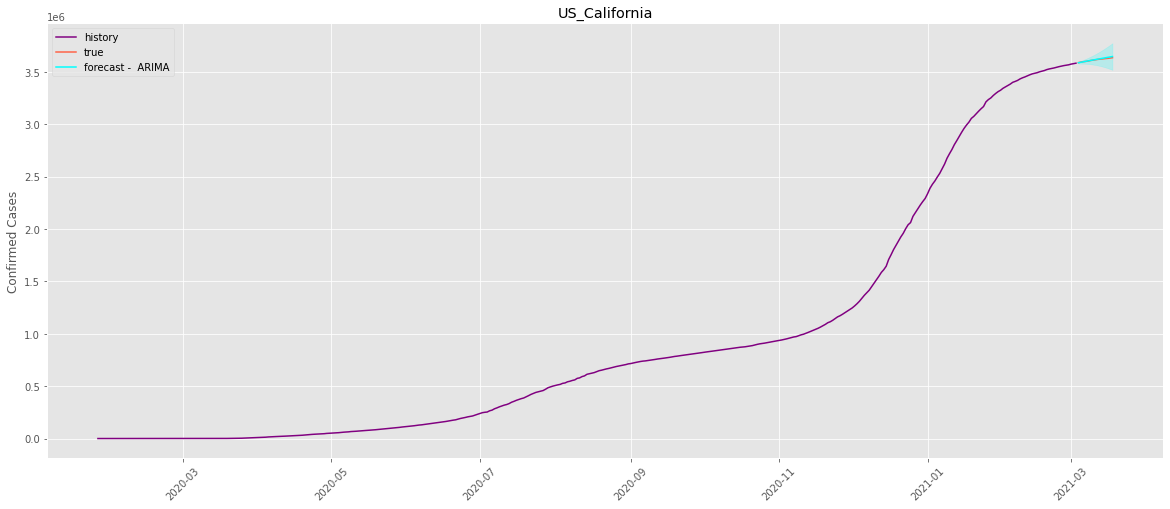

In [105]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('dark')
#plt.style.use('dark_background')
plt.style.use('ggplot')

plt.figure(figsize=(20,8))
info_train = covid19_train[(covid19_train['province_state'] == state)]
plt.plot(info_train['date'], info_train['confirmed'], label='history', color='purple')
info_val = covid19_val[(covid19_val['province_state'] == state)]
plt.plot(info_val['date'], info_val['confirmed'], label='true', color='tomato')
info_pred = y_arima[(y_arima['province_state'] == state)]
plt.plot(info_pred['date'], info_pred['confirmed'], label='forecast -  ARIMA', color='cyan')
info_pred_lower = y_arima_lower[(y_arima_lower['province_state'] == state)]
info_pred_upper = y_arima_upper[(y_arima_upper['province_state'] == state)]
plt.fill_between(x=info_val['date'], y1=info_pred_lower['confirmed'], y2=info_pred_upper['confirmed'], color='cyan', alpha=0.2)
plt.title('{}_{}'.format('US',state))
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [106]:
for state in covid19_train['province_state'].unique():
    print(state)

Alabama
Alameda County, CA
Alaska
American Samoa
Arizona
Arkansas
Ashland, NE
Bennington County, VT
Bergen County, NJ
Berkeley, CA
Berkshire County, MA
Boston, MA
Broward County, FL
California
Carver County, MN
Charleston County, SC
Charlotte County, FL
Chatham County, NC
Cherokee County, GA
Chicago
Chicago, IL
Clark County, NV
Clark County, WA
Cobb County, GA
Collin County, TX
Colorado
Connecticut
Contra Costa County, CA
Cook County, IL
Davidson County, TN
Davis County, UT
Delaware
Delaware County, PA
Denver County, CO
Diamond Princess
District of Columbia
Douglas County, CO
Douglas County, NE
Douglas County, OR
El Paso County, CO
Fairfax County, VA
Fairfield County, CT
Fayette County, KY
Florida
Floyd County, GA
Fort Bend County, TX
Fresno County, CA
Fulton County, GA
Georgia
Grafton County, NH
Grand Princess
Grand Princess Cruise Ship
Grant County, WA
Guam
Harford County, MD
Harris County, TX
Harrison County, KY
Hawaii
Hendricks County, IN
Hillsborough, FL
Honolulu County, HI
Hudson

## Saving dataframe back to BigQuery

In [107]:
output_dataset_id = 'covid_demo'

output_table_id = 'covid_demo_info' 

replace_or_append_output = 'replace' #['replace', 'append']

# Combine project and dataset
project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))


Dataset cmpe181hw1option1.covid_demo doesn't exist, so creating it



In [108]:
#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

covid_demo


In [109]:
y_arima_df = y_arima[['province_state','date','confirmed', 'deaths']]
y_arima_df.head(30)

province_state       date  confirmed   deaths
356        Alabama 2021-03-04   498076.0  10094.0
357        Alabama 2021-03-05   498887.0  10122.0
358        Alabama 2021-03-06   499411.0  10149.0
359        Alabama 2021-03-07   499819.0  10148.0
360        Alabama 2021-03-08   500092.0  10148.0
361        Alabama 2021-03-09   500616.0  10186.0
362        Alabama 2021-03-10   501398.0  10222.0
363        Alabama 2021-03-11   502263.0  10274.0
364        Alabama 2021-03-12   502711.0  10299.0
365        Alabama 2021-03-13   503305.0  10327.0
366        Alabama 2021-03-14   503673.0  10327.0
367        Alabama 2021-03-15   508229.0  10329.0
368        Alabama 2021-03-16   508717.0  10337.0
369        Alabama 2021-03-17   509476.0  10363.0
370        Alabama 2021-03-18   510048.0  10391.0
732         Alaska 2021-03-04    59138.0    303.0
733         Alaska 2021-03-05    59285.0    305.0
734         Alaska 2021-03-06    59285.0    305.0
735         Alaska 2021-03-07    59285.0    305.0
736         Alaska 2021-03-08    59624.0    305.0
737         Alaska 2021-03-09    59712.0    305.0
738         Alaska 2021-03-10    59863.0    305.0
739         Alaska 2021-03-11    60099.0    305.0
740         Alaska 2021-03-12    60207.0    306.0
741         Alaska 2021-03-13    60207.0    306.0
742         Alaska 2021-03-14    60207.0    306.0
743         Alaska 2021-03-15    60591.0    306.0
744         Alaska 2021-03-16    60691.0    306.0
745         Alaska 2021-03-17    60864.0    307.0
746         Alaska 2021-03-18    61019.0    310.0

In [110]:
job_config = bigquery.LoadJobConfig()

# Modify job config depending on if we want to replace or append to table
if(replace_or_append_output == 'replace'):
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
else:  
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

dataset_ref = client.dataset(output_dataset_id)
table_ref = dataset_ref.table(output_table_id)

# Use client functionality to load BigQuery table from Pandas data frame
client.load_table_from_dataframe(
 dataframe = y_arima_df,
 destination = table_ref,
 job_config = job_config
 ).result()
 
print('Write to bigquery dataset (' + replace_or_append_output + ') to ' + project_dataset + '.' + output_table_id +'\n')

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning:

Unable to determine type of column 'province_state'.



Write to bigquery dataset (replace) to cmpe181hw1option1.covid_demo.covid_demo_info



In [112]:
#access our own dataset
sql = """
SELECT
    *
FROM
    `cmpe181hw1option1.covid_demo.covid_demo_info`
"""
dfmycovidquery = client.query(sql)
dfmycovid=dfmycovidquery.to_dataframe()
dfmycovid.head()

province_state                      date  ...   deaths  __index_level_0__
0        Alabama 2021-03-04 00:00:00+00:00  ...  10094.0                356
1        Alabama 2021-03-05 00:00:00+00:00  ...  10122.0                357
2        Alabama 2021-03-06 00:00:00+00:00  ...  10149.0                358
3        Alabama 2021-03-07 00:00:00+00:00  ...  10148.0                359
4        Alabama 2021-03-08 00:00:00+00:00  ...  10148.0                360

[5 rows x 5 columns]

In [113]:
dfmycovid

province_state                      date  ...   deaths  __index_level_0__
0          Alabama 2021-03-04 00:00:00+00:00  ...  10094.0                356
1          Alabama 2021-03-05 00:00:00+00:00  ...  10122.0                357
2          Alabama 2021-03-06 00:00:00+00:00  ...  10149.0                358
3          Alabama 2021-03-07 00:00:00+00:00  ...  10148.0                359
4          Alabama 2021-03-08 00:00:00+00:00  ...  10148.0                360
..             ...                       ...  ...      ...                ...
865        Wyoming 2021-03-14 00:00:00+00:00  ...    691.0              22555
866        Wyoming 2021-03-15 00:00:00+00:00  ...    691.0              22556
867        Wyoming 2021-03-16 00:00:00+00:00  ...    693.0              22557
868        Wyoming 2021-03-17 00:00:00+00:00  ...    693.0              22558
869        Wyoming 2021-03-18 00:00:00+00:00  ...    693.0              22559

[870 rows x 5 columns]

# Weather

Use BigQuery via magics: The google.cloud.bigquery library also includes a magic command which runs a query and either displays the result or saves it to a variable as a DataFrame.

In [119]:
%%bigquery weather_JFK --project cmpe181hw1option1
SELECT
  *
FROM
    `bigquery-public-data.noaa_gsod.gsod2019`
WHERE
  stn="744860"   -- JFK

In [121]:
weather_JFK

stn   wban  year  mo  ... snow_ice_pellets  hail  thunder  tornado_funnel_cloud
0    744860  94789  2019  01  ...                0     0        0                     0
1    744860  94789  2019  12  ...                1     0        0                     0
2    744860  94789  2019  07  ...                0     0        1                     0
3    744860  94789  2019  05  ...                0     0        1                     0
4    744860  94789  2019  10  ...                0     0        0                     0
..      ...    ...   ...  ..  ...              ...   ...      ...                   ...
360  744860  94789  2019  10  ...                0     0        0                     0
361  744860  94789  2019  10  ...                0     0        0                     0
362  744860  94789  2019  02  ...                0     0        0                     0
363  744860  94789  2019  03  ...                0     0        0                     0
364  744860  94789  2019  10  ...                0     0        0                     0

[365 rows x 32 columns]

In [124]:
%%bigquery weather_JFK_filtered --project cmpe181hw1option1
SELECT
  -- Create a timestamp from the date components.
  timestamp(concat(year,"-",mo,"-",da)) as timestamp,
  -- Replace numerical null values with actual nulls
  AVG(IF (temp=9999.9, null, temp)) AS temperature,
  AVG(IF (visib=999.9, null, visib)) AS visibility,
  AVG(IF (wdsp="999.9", null, CAST(wdsp AS Float64))) AS wind_speed,
  AVG(IF (gust=999.9, null, gust)) AS wind_gust,
  AVG(IF (prcp=99.99, null, prcp)) AS precipitation,
  AVG(IF (sndp=999.9, null, sndp)) AS snow_depth
FROM
  `bigquery-public-data.noaa_gsod.gsod20*`
WHERE
  CAST(YEAR AS INT64) > 2018
  AND stn="744860"    -- JFK
GROUP BY timestamp

In [125]:
weather_JFK_filtered

timestamp  temperature  ...  precipitation  snow_depth
0   2021-01-05 00:00:00+00:00         38.9  ...           0.01         NaN
1   2021-01-19 00:00:00+00:00         38.3  ...           0.00         NaN
2   2021-01-30 00:00:00+00:00         22.5  ...           0.00         NaN
3   2021-02-18 00:00:00+00:00         27.8  ...           0.00         5.1
4   2021-02-21 00:00:00+00:00         29.3  ...           0.00         3.9
..                        ...          ...  ...            ...         ...
803 2020-10-06 00:00:00+00:00         61.9  ...           0.07         NaN
804 2020-07-31 00:00:00+00:00         75.7  ...           0.90         NaN
805 2020-07-10 00:00:00+00:00         76.1  ...           0.00         NaN
806 2020-06-11 00:00:00+00:00         68.3  ...           0.00         NaN
807 2020-07-23 00:00:00+00:00         77.2  ...           0.53         NaN

[808 rows x 7 columns]

724940 23234 SAN FRANCISCO INTERNATIONAL A ref: https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.txt

In [128]:
#@title Get Daily Temperature Data for SFO Station (2019)
%%bigquery SFO_daily_2019 --project cmpe181hw1option1

SELECT
  # Station information
  daily_weather.stn AS usaf,
  
  # Convert year/month/day info into date
  DATE(
    CAST(daily_weather.year AS INT64),
    CAST(daily_weather.mo AS INT64),
    CAST(daily_weather.da AS INT64)
    ) AS date,
  
  daily_weather.temp AS avg_temp,
  daily_weather.count_temp AS n_for_avg_temp,
  
  daily_weather.max AS max_temp,
  daily_weather.flag_max AS max_temp_flag,
  
  daily_weather.min AS min_temp,
  daily_weather.flag_min AS min_temp_flag

FROM
  `bigquery-public-data.noaa_gsod.gsod2019` daily_weather

WHERE 
  # Filter to only chosen station
  daily_weather.stn = "724940" AND
  # Remove days w/ missing temps coded as 99999.9 (can throw off calculations)
  daily_weather.temp != 9999.9 AND
  daily_weather.max != 9999.9 AND
  daily_weather.min != 9999.9

ORDER BY
  date DESC

In [129]:
SFO_daily_2019

usaf        date  avg_temp  ...  max_temp_flag  min_temp min_temp_flag
0    724940  2019-12-31      50.2  ...           None      41.0          None
1    724940  2019-12-30      51.8  ...           None      46.9          None
2    724940  2019-12-29      53.0  ...           None      39.9          None
3    724940  2019-12-28      49.1  ...           None      39.0          None
4    724940  2019-12-27      49.1  ...           None      39.0          None
..      ...         ...       ...  ...            ...       ...           ...
360  724940  2019-01-05      53.1  ...           None      39.0          None
361  724940  2019-01-04      46.8  ...           None      39.0          None
362  724940  2019-01-03      46.2  ...           None      37.9          None
363  724940  2019-01-02      46.3  ...           None      37.9          None
364  724940  2019-01-01      50.5  ...           None      44.1          None

[365 rows x 8 columns]

In [130]:
# 10 highest avg_temp samples
SFO_daily_2019.sort_values('avg_temp', ascending=False).head(10)

usaf        date  avg_temp  ...  max_temp_flag  min_temp min_temp_flag
203  724940  2019-06-11      79.0  ...           None      66.9          None
204  724940  2019-06-10      78.1  ...           None      55.0          None
97   724940  2019-09-25      77.7  ...           None      61.0          None
202  724940  2019-06-12      76.9  ...           None      66.9          None
96   724940  2019-09-26      74.5  ...           None      64.0          None
109  724940  2019-09-13      74.4  ...           None      61.0          None
68   724940  2019-10-24      73.6  ...           None      55.0          None
138  724940  2019-08-15      73.0  ...           None      61.0          None
98   724940  2019-09-24      72.3  ...           None      57.9          None
205  724940  2019-06-09      72.1  ...           None      52.0          None

[10 rows x 8 columns]

In [131]:
import pandas as pd

# Create table of temperature series to plot, with names, symbols, colors
daily_temp_plot_fields = pd.DataFrame.from_records(  
  columns = ['field_name', 'plot_label', 'marker_symbol', 'line_color', 
    'plot_mode'],
  data = [
    ('avg_temp', 'Avg', 'circle', None, 'markers'),
    ('max_temp', 'Max', 'triangle-up', None, 'markers'),
    ('min_temp', 'Min', 'triangle-down', None, 'markers')
    ]
  )

In [132]:
daily_temp_plot_fields

field_name plot_label  marker_symbol line_color plot_mode
0   avg_temp        Avg         circle       None   markers
1   max_temp        Max    triangle-up       None   markers
2   min_temp        Min  triangle-down       None   markers

In [134]:
import plotly.graph_objects as go
import plotly.io as pio

# Create function to plot single station daily temperature
def plot_single_station_daily_temp(daily_temp_data, plot_fields, station_name):
  daily_plot_data = []

  for index, row in plot_fields.iterrows():
    daily_plot_data = (daily_plot_data +
      [go.Scatter(
        x = daily_temp_data['date'],
        y = daily_temp_data[row['field_name']],
        name = row['plot_label'],
        marker = dict(
          # Constant color scale for plotting temp to use for all stations
          cmin = -22, # -22°F corresponds to -30°C (very cold, to most)
          cmax = 122, # 122°F corresponds to 50°C (very hot, to most)
          color = daily_temp_data[row['field_name']], 
          # colorscale = 'BlueReds',
          colorscale = [[0, 'rgb(0, 0, 230)'], [0.5, 'rgb(190, 190, 190)'],
            [1, 'rgb(230, 0, 0)']],
          symbol = row['marker_symbol']
          ),
        line = dict(
          color = row['line_color']
          ),
        mode = row['plot_mode']
        )]
      )

  daily_plot_layout = go.Layout(
    title = dict(
      text = (station_name + ' Daily Temperature'),
      xref = "paper", 
      x = 0.5
      ),
    yaxis = dict(title = 'Temperature (°F)')
    )

  pio.show(go.Figure(daily_plot_data, daily_plot_layout))

In [144]:
chosen_station_name="SFO"
plot_single_station_daily_temp(SFO_daily_2019,
  daily_temp_plot_fields, chosen_station_name)

## Multi-Year data for SFO

In [184]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpe181hw1option1'
client = bigquery.Client(project=project_id)

In [183]:
!gcloud config list
!gcloud config set project 'cmpe181hw1option1'

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = danielle.shen@sjsu.edu
project = cmpe181hw1option1

Your active configuration is: [default]
Updated property [core/project].


In [168]:
import numpy as np

#@title Get and Plot Multi-Year Daily Temperature Data for Chosen Station
chosen_start_year = 2005 #@param{type:"integer"}

chosen_end_year = 2019 #@param{type:"integer"}

def get_single_station_daily_temp_multiple_yrs(station_usaf, start_year, 
  end_year):
  
  single_station_daily_weather_multiyear_union_sql = ("\nUNION ALL\n".
    join([('''
      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod{year}`
      WHERE stn = '{station_usaf}')
      ''')
    .format(year = year, station_usaf = station_usaf)
       for year in np.arange(start_year, (end_year + 1))
    ]))

  single_station_daily_multiyear_sql = '''
    WITH
    daily_weather AS
    (
      {daily_weather_table}
    )

    SELECT
      daily_weather.stn AS usaf,
      
      # Convert year/month/day info into date
      DATE(
        CAST(daily_weather.year AS INT64),
        CAST(daily_weather.mo AS INT64),
        CAST(daily_weather.da AS INT64)
        ) AS date,
      
      daily_weather.temp AS avg_temp,
      daily_weather.count_temp AS n_for_avg_temp,
      
      daily_weather.max AS max_temp,
      daily_weather.flag_max AS max_temp_flag,
      
      daily_weather.min AS min_temp,
      daily_weather.flag_min AS min_temp_flag

    FROM
      daily_weather
    
    WHERE 
      # Remove days w/ missing temps coded as 99999.9 (can throw off calcs)
      daily_weather.temp != 9999.9 AND
      daily_weather.max != 9999.9 AND
      daily_weather.min != 9999.9

    ORDER BY
      date DESC
    '''

  single_station_daily_multiyear_query = (single_station_daily_multiyear_sql.
    format(
      daily_weather_table = single_station_daily_weather_multiyear_union_sql,
      station_usaf = station_usaf
      )
    )
  return single_station_daily_multiyear_query

  # single_station_daily_multiyear_df = (client.
  #   query(single_station_daily_multiyear_query).
  #   to_pandas()
  #   )

  # return(single_station_daily_multiyear_df)

In [169]:
chosen_station_usaf="724940" #SFO
chosen_station_daily_multiyear = get_single_station_daily_temp_multiple_yrs(
  chosen_station_usaf, chosen_start_year, chosen_end_year)

In [170]:
chosen_station_daily_multiyear

"\n    WITH\n    daily_weather AS\n    (\n      \n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2005`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2006`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2007`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2008`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2009`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2010`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2011`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2012`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquer

In [171]:
dfquery_SFO_multiyear = client.query(chosen_station_daily_multiyear)

In [172]:
dfquery_SFO_multiyear

In [173]:
df_query_SFO_multiyear=dfquery_SFO_multiyear.to_dataframe()

In [174]:
df_query_SFO_multiyear

usaf        date  avg_temp  ...  max_temp_flag  min_temp min_temp_flag
0     724940  2019-12-31      50.2  ...           None      41.0          None
1     724940  2019-12-30      51.8  ...           None      46.9          None
2     724940  2019-12-29      53.0  ...           None      39.9          None
3     724940  2019-12-28      49.1  ...           None      39.0          None
4     724940  2019-12-27      49.1  ...           None      39.0          None
...      ...         ...       ...  ...            ...       ...           ...
5473  724940  2005-01-05      48.3  ...              *      43.0             *
5474  724940  2005-01-04      48.2  ...              *      42.8             *
5475  724940  2005-01-03      47.7  ...              *      44.6             *
5476  724940  2005-01-02      48.7  ...              *      46.9             *
5477  724940  2005-01-01      50.4  ...              *      46.0             *

[5478 rows x 8 columns]

In [175]:
plot_single_station_daily_temp(df_query_SFO_multiyear, 
  daily_temp_plot_fields, chosen_station_name)

We use scipy's curve fit optimization method to estimate a sinusoidal model for the daily temperature at a given weather station. The functions are set up to run the optimization to fit 4 parameters - mean, amp (for amplitude), freq (frequency), and phase_shift - and return either those parameters or the estimated daily temperature values from the model for that station. This Stack Overflow post provides some more useful technical details on how to fit this type of curve using these Python libraries.

In [176]:
import scipy.optimize

In [177]:
# Describe sinusoidal model as function w/ parameters of interest
def sine_function(t, amp, freq, phase_shift, mean):
  return (amp * np.sin(freq * 2 * np.pi * (t - phase_shift)) + mean)

# Fit sinusoidal model to data, return either fit info or daily temp estimates
def fit_sine_curve_to_daily_temp_data(daily_temp_data, temp_field_name,
  return_value = 'sine curve fit info'):

  # Calculate total range of days in data
  daily_temp_data['days_since_start'] = (daily_temp_data['date'] - 
    min(daily_temp_data['date'])).dt.days

  # Starting point for mean is mean of temp in data set
  guess_mean = daily_temp_data[temp_field_name].mean()
  
  # Starting point for amplitude is half diff btw 1st & 99th %tiles of temp
  guess_amp = (daily_temp_data[temp_field_name].quantile(0.99) -
    daily_temp_data[temp_field_name].quantile(0.01)) / 2

  # Starting point for frequency is inverse of avg # of days in year
  guess_freq = 1/365.25
  
  # Starting point for phase shift is +80 days (into spring, in most cases)
  guess_phase_shift = 80

  # Use curve fit optimizer on data, w/ above guesses as starting points
  sine_curve_fit = scipy.optimize.curve_fit(
    f = sine_function,
    xdata = np.array(daily_temp_data['days_since_start']),
    ydata = np.array(daily_temp_data[temp_field_name]),
    p0 = [guess_amp, guess_freq, guess_phase_shift, guess_mean]
    )

  # Extract estimated parameters from curve fit  
  est_amp, est_freq, est_phase_shift, est_mean = sine_curve_fit[0]

  # Use sine function & parameters to get daily estimates of average temperature
  daily_temp_data['est_' + temp_field_name] = sine_function(
    daily_temp_data['days_since_start'],
    est_amp, est_freq, est_phase_shift, est_mean
    )
  
  # Calculate mean absolute error of estimates vs actual temperature
  curve_estimate_mean_abs_err = abs(
    daily_temp_data['est_' + temp_field_name] - daily_temp_data[temp_field_name]
    ).mean()

  # Create data frame of sine curve fit info
  sine_curve_fit_info_df = pd.DataFrame(data = [{
    ('est_amp_' + temp_field_name): est_amp,
    ('est_freq_' + temp_field_name): est_freq,
    ('est_phase_shift_' + temp_field_name): est_phase_shift,
    ('est_mean_' + temp_field_name): est_mean,
    ('est_range_' + temp_field_name): 2 * abs(est_amp),
    ('mae_fitted_' + temp_field_name): curve_estimate_mean_abs_err
    }])
  
  # Return either sine curve fit into or daily temp data w/ estimates
  if(return_value == 'sine curve fit info'):
    return(sine_curve_fit_info_df)

  elif(return_value == 'daily temp data with estimates'):
    return(daily_temp_data)

In [178]:
# Use function to fit sine curve, get out daily temp estimates for given station
chosen_station_daily_temp_with_preds = fit_sine_curve_to_daily_temp_data(
  daily_temp_data = df_query_SFO_multiyear, 
  temp_field_name = 'avg_temp',
  return_value = 'daily temp data with estimates'
  )

In [179]:
chosen_station_daily_temp_with_preds

Output hidden; open in https://colab.research.google.com to view.

In [180]:
# Set up plot fields structure: points for actual temp, curve for estimated temp
daily_avg_and_estimate_plot_fields = pd.DataFrame.from_records(
  columns = ['field_name', 'plot_label', 'marker_symbol', 'line_color', 
    'plot_mode'],
  data = [
    ('avg_temp', 'Actual Avg', 'circle', None, 'markers'),
    ('est_avg_temp', 'Estimated Avg', None, 'purple', 'lines')
    ]
  )

# Use function to plot daily temperature with estimates for given station
plot_single_station_daily_temp(df_query_SFO_multiyear, 
  daily_avg_and_estimate_plot_fields, "SFO")